In [1]:
pwd

'C:\\Users\\tvimal\\Desktop'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.utils import shuffle
import keras
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense
from  sklearn.model_selection import GridSearchCV
from keras.layers.core import Dropout
from sklearn  import metrics
from keras.wrappers.scikit_learn import KerasClassifier
Classifier=Sequential()
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.metrics import accuracy_score
from IPython.display import display
pd.options.display.max_columns = None
display()
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
import teradata
import pandas as pd
host,user,pwd ='10.132.4.11','id', "password"
udaExec =teradata.UdaExec (appName="HelloWorld", version="1.0",logConsole=False)
with udaExec.connect(method="ODBC", system=host,username=user,password=pwd) as session:
    query = '''SELECT * from dw_ckm.Training_cas '''
    data = pd.read_sql(query,session)  
#print(df.columns.tolist()) #columns 
data.shape 

In [3]:
data=pd.read_excel('C:\\Users\\tvimal\\Desktop\\GITHUB\\base_data.xlsx')
#data.info()
data=data.set_index('CUST_NBR')
data=data.drop('FEA_1',axis=1)
data.head()

,PRODUCT,RACE,Occupation_Group,Age_Band,FEA_2,TARGET,FEA_3,FEA_4,FEA_5,FEA_6,FEA_7,FEA_8,FEA_9,FEA_10,FEA_11,FEA_12,FEA_13,FEA_14,FEA_15,FEA_16,FEA_17,FEA_18,FEA_19,FEA_20,FEA_21,FEA_22,FEA_23,FEA_24,INDI_H,INDI_F,INDI_C
CUST_NBR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,prod_3,RACE_4,OCCP_1,AGE_BAND_1,4,1,0,0,0.00,0.0,0,0,0.0,0,0,0.00,0,0,0,0.0,0,0,0,0.0,0.00,0,0,0.0,0,0,1
2,prod_1,RACE_1,OCCP_2,AGE_BAND_2,5,1,0,0,-1624.66,0.0,0,0,0.0,0,7,1624.66,0,1,3,2350.0,0,0,7,0.0,1624.66,1,3,2350.0,0,0,1
3,prod_3,RACE_4,OCCP_3,AGE_BAND_3,4,1,0,0,-5.30,0.0,0,0,0.0,0,2,5.30,0,0,0,0.0,0,0,2,0.0,5.30,0,0,0.0,0,0,1
4,prod_3,RACE_3,OCCP_3,AGE_BAND_4,4,1,0,0,0.00,0.0,0,0,0.0,0,0,0.00,0,0,0,0.0,0,0,0,0.0,0.00,0,0,0.0,0,0,1
5,prod_1,RACE_4,OCCP_4,AGE_BAND_5,5,1,0,0,0.00,0.0,0,0,0.0,0,0,0.00,0,0,0,0.0,0,0,0,0.0,0.00,0,0,0.0,0,0,1


data.columns

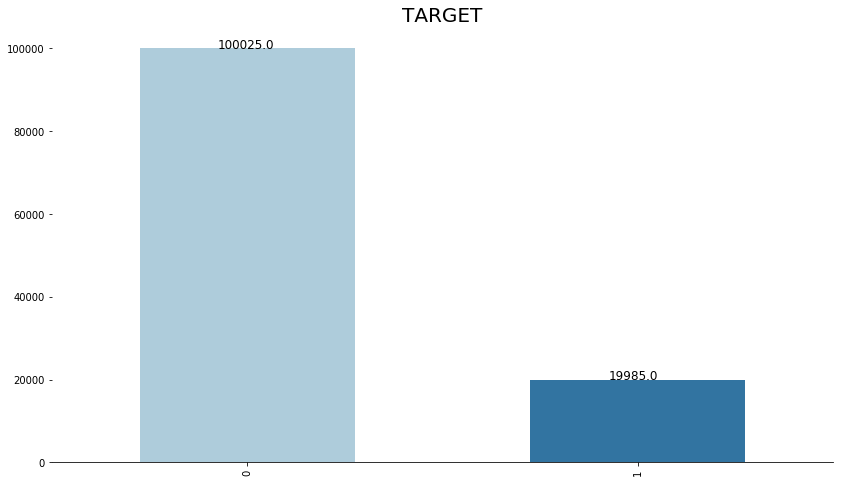

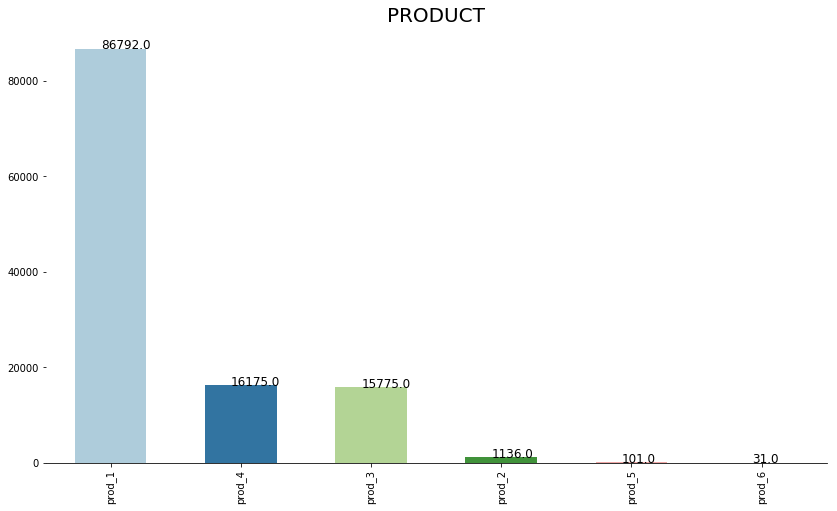

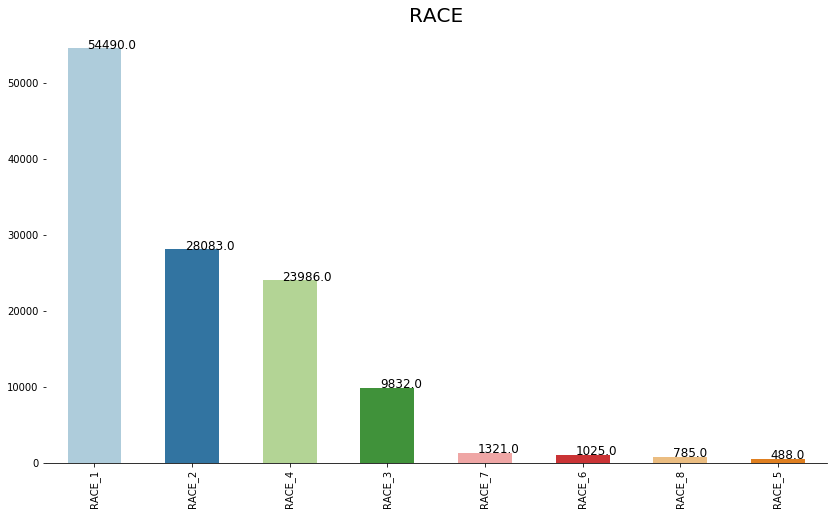

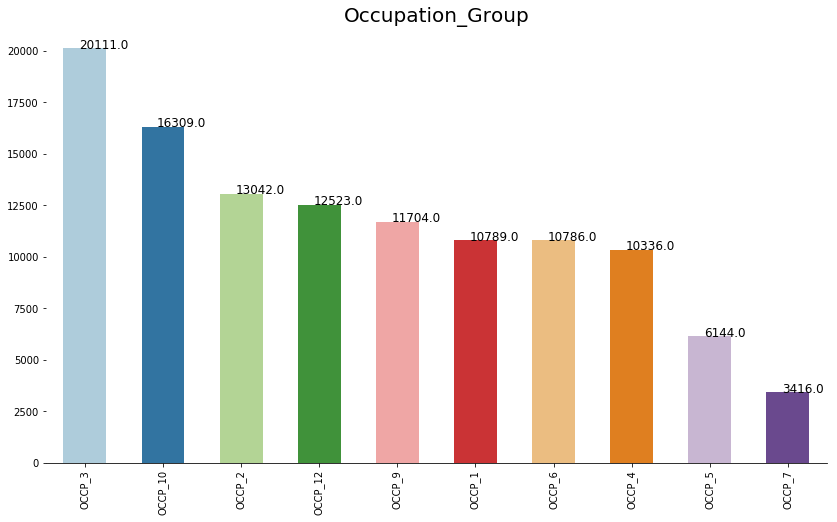

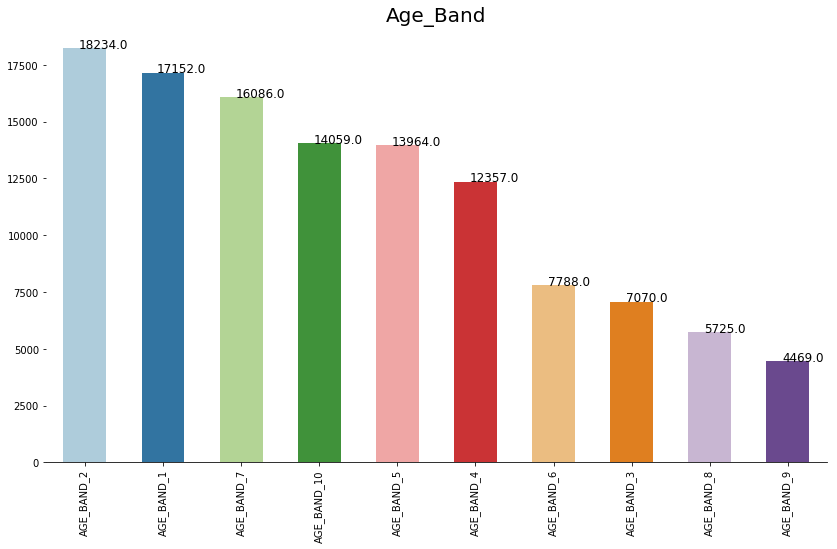

In [4]:
#category counts of each feature
cat_col=['TARGET','PRODUCT', 'RACE', 'Occupation_Group', 'Age_Band']
for column in cat_col:
    def plot_categorical_count(data, column, title='', limit=2, xtick_rotation='vertical'):
        column_count = data[column].value_counts()[:limit]
        fig = plt.figure(figsize=(14, 8))
        ax=sns.barplot(x=column_count.index, y=column_count.values, palette='Paired')
        sns.despine(left=True)
        plt.title(title, fontsize=16)
        plt.xticks(rotation=xtick_rotation)
        for i in ax.patches:
            # get_x pulls left or right; get_height pushes up or down
            ax.set_title(column,fontdict={'fontsize':20}),#'fontweight' :20,'verticalalignment': 'baseline', 'horizontalalignment': loc}
            current_width = i.get_width()
            diff = current_width -.55
            i.set_width(.55)
            i.set_x(i.get_x() + diff * .5)
            
            ax.text(i.get_x()+0.2,i.get_height(),\
                    str(round((i.get_height()),2)), fontsize=12,color='black')##total)*100
    plt.show(plot_categorical_count(data, column, title=column, limit=10))

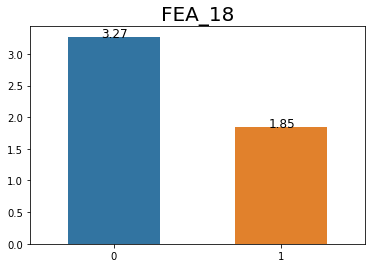

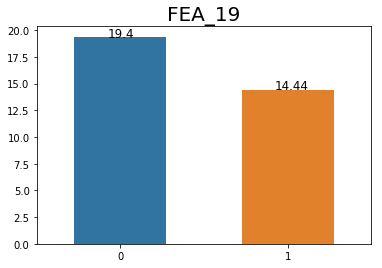

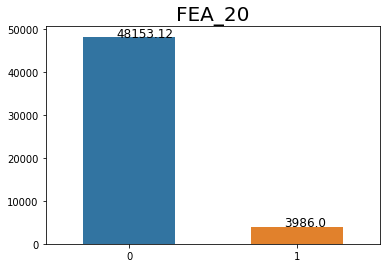

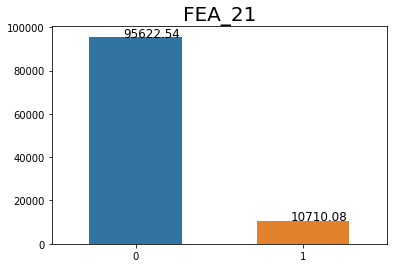

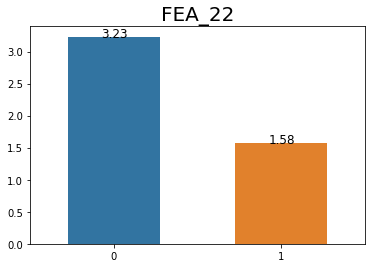

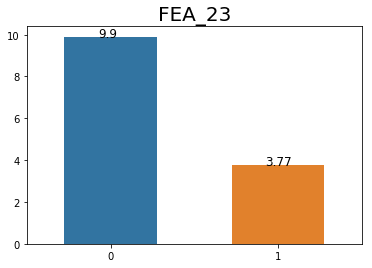

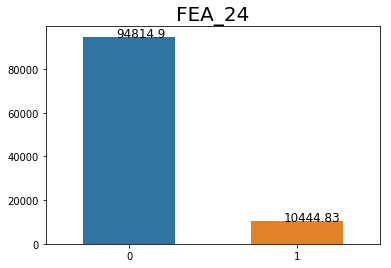

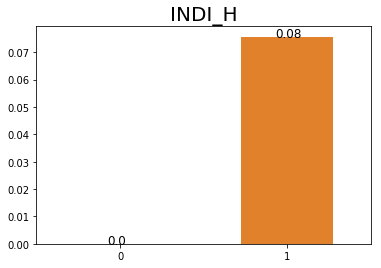

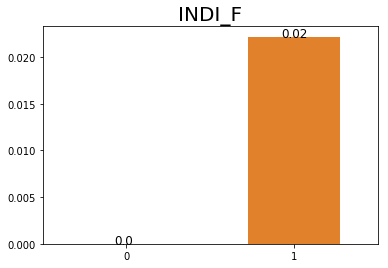

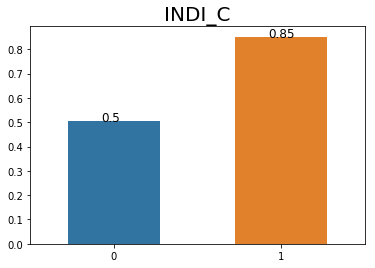

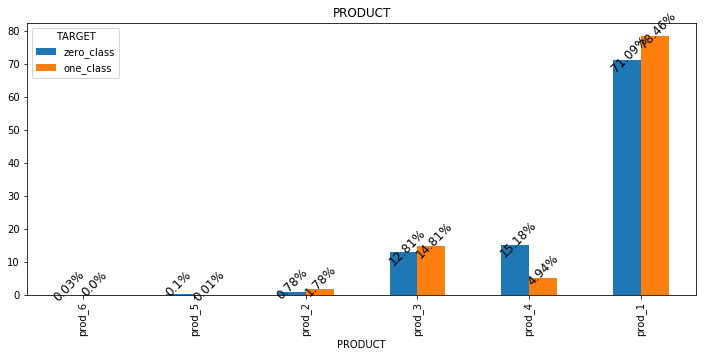

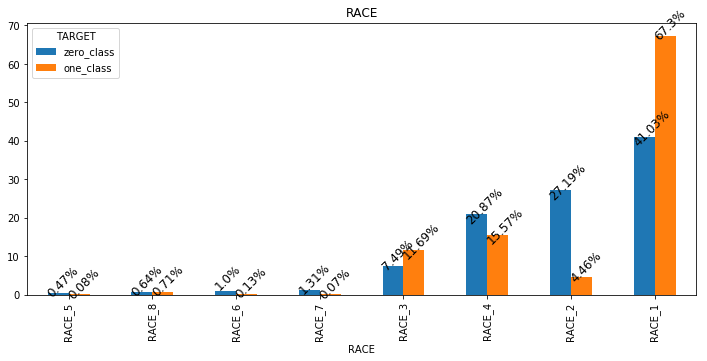

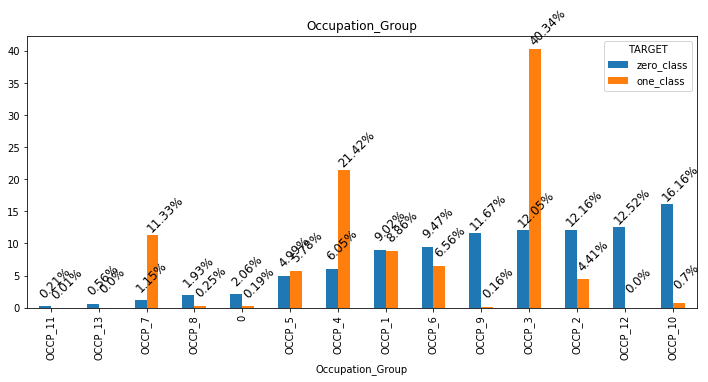

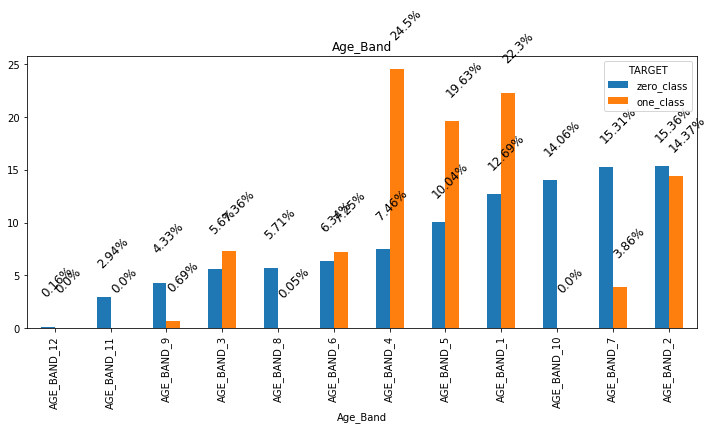

In [5]:
analysis=data.drop('TARGET',axis=1)
analysis.columns
cat_list=[]
num_list=[]    
for feature in analysis.columns.tolist():
    if analysis[feature].dtype=='object':
        cat_list.append(feature)
    else:
        num_list.append(feature)
        
num_list=['FEA_18', 'FEA_19', 'FEA_20', 'FEA_21', 'FEA_22', 'FEA_23', 'FEA_24','INDI_H', 'INDI_F', 'INDI_C']
for var in num_list:
    def means(var):
        dff=data[[var,'TARGET']]
        g=dff.groupby('TARGET').agg('mean')
        dfs = pd.DataFrame(g, index=[0,1]).rename(columns={0:'mean_zero_class',1:'mean_one_class'})
        ax=sns.barplot(x=dfs.index, y=np.array(dfs.values).ravel())
        for i in ax.patches:
            # get_x pulls left or right; get_height pushes up or down
            ax.set_title(var,fontdict={'fontsize':20}),#'fontweight' :20,'verticalalignment': 'baseline', 'horizontalalignment': loc}
            current_width = i.get_width()
            diff = current_width -.55
            i.set_width(.55)
            i.set_x(i.get_x() + diff * .5)
            
            ax.text(i.get_x()+0.2,i.get_height(),\
                    str(round((i.get_height()),2)), fontsize=12,color='black')##total)*100
            #filename = 'C:\\Users\\tvimal\\Desktop\\' + str(var) +'.png'
            #plt.savefig(filename, dpi=300, format='png', bbox_inches='tight')
    plt.show(means(var))

#######################
cat_lst=['PRODUCT', 'RACE', 'Occupation_Group', 'Age_Band']
for name  in cat_lst: 

    fnl=pd.crosstab(index=data[name], columns=data['TARGET'])
    fnl['zero_class']=np.round(fnl[0]/fnl[0].sum(),4)*100
    fnl['one_class']=np.round(fnl[1]/fnl[1].sum(),4)*100
    okk=fnl[['zero_class','one_class']].sort_values(by='zero_class')#,ascending=False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
    ax=okk[['zero_class','one_class']].plot(kind='bar', figsize=(12,5),title=name,grid=False)#subplots=True
    #plt.annotate( label,  (okk.index,okk['one_class'].values),   xytext=(0, space), textcoords="offset points", ha='center', va=va)
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()-.03,i.get_height()+ 5,\
                str(round((i.get_height()/100)*100, 2))+'%', fontsize=12,color='black',rotation=45)
        #filename = 'C:\\Users\\tvimal\\Desktop\\' + str(name) +'.png'
        #plt.savefig(filename, dpi=300, format='png', bbox_inches='tight')

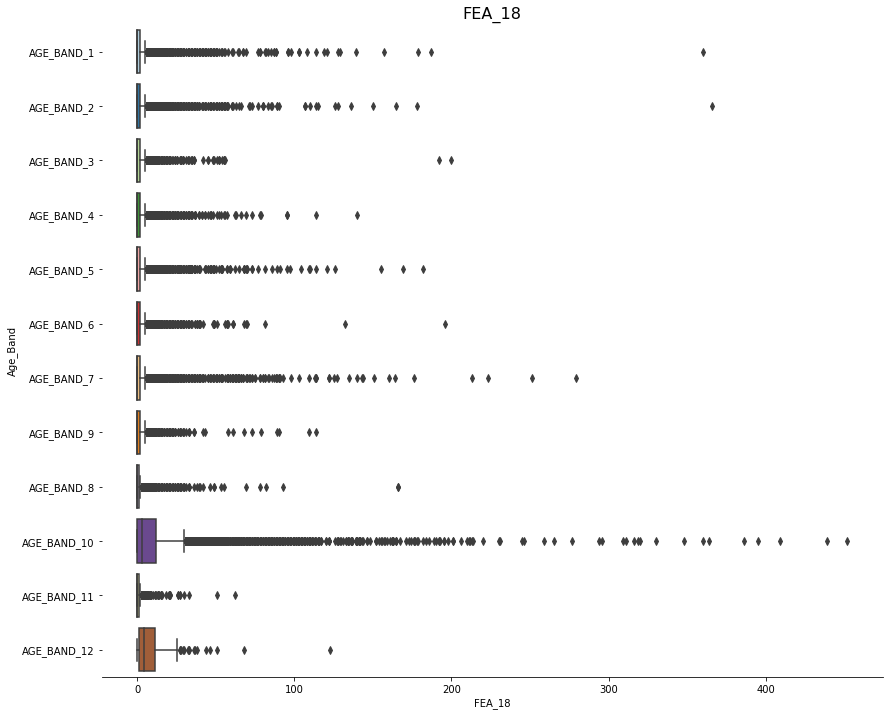

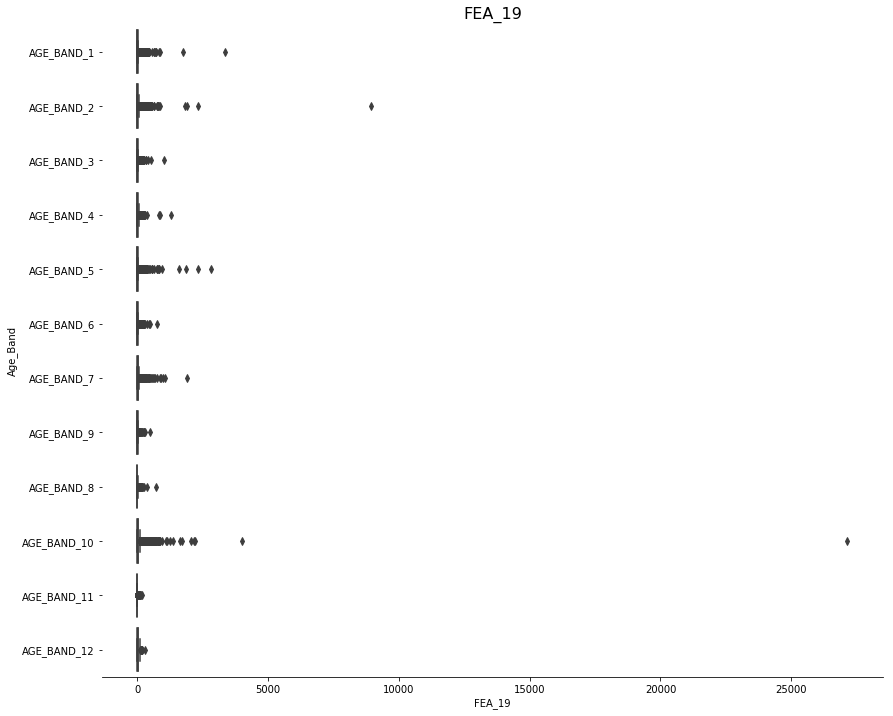

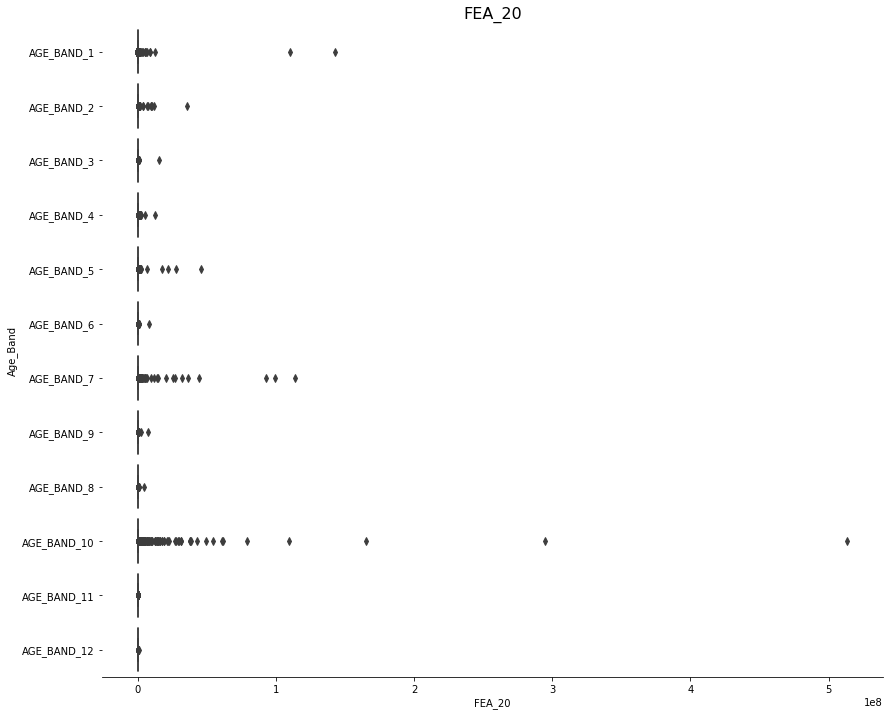

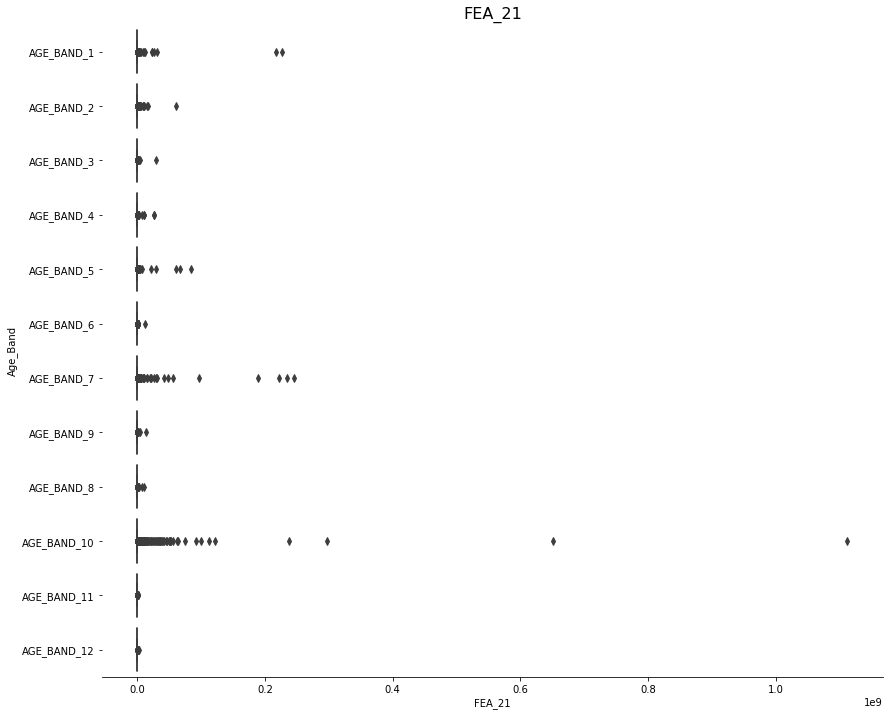

In [6]:
ds=data
#outliers on each num-columns according to target_var
num_lst=['FEA_18', 'FEA_19', 'FEA_20', 'FEA_21']
for i in num_lst:
    def outliers(i)   :
        plt.figure(figsize=(14, 12))
        #df_top10 = df.where(df['target'].isin(df.target.values))#

        sns.boxplot(data=ds, x=i, y='Age_Band', palette='Paired')
        plt.title(i, fontsize=16)
        sns.despine(left=True)
    outliers(i)

# Null hypothesis Test

In [7]:
#chi square test for output variable with input categorical features
cat_col=['PRODUCT', 'RACE', 'Occupation_Group', 'Age_Band']
for i in cat_col:
    def chi_test(i):
        table = pd.crosstab(index=data[i], columns=data['TARGET'])
        table
        from scipy.stats import chi2_contingency
        stat, p, dof, expected = chi2_contingency(table)
        print( '%s ,chi_stat=%s ,p_value=%s' % (i,stat,p))
    chi_test(i)

PRODUCT ,chi_stat=1671.78927282926 ,p_value=0.0
RACE ,chi_stat=7245.253271738246 ,p_value=0.0
Occupation_Group ,chi_stat=28149.981197635978 ,p_value=0.0
Age_Band ,chi_stat=13986.730022975093 ,p_value=0.0


In [8]:
for num in num_list:  
    import numpy as np
    from scipy.stats import ttest_ind
    from scipy import stats
    ttest=data[['TARGET',num]];  ttest.groupby('TARGET').mean()
    ttest=ttest.replace(np.nan,0); ttest=ttest.replace(np.inf,0); ttest=ttest.replace(-np.inf,0)
    cat1 = ttest[ttest['TARGET']==0];    cat2 =ttest[ttest['TARGET']==1]
    stat=stats.f_oneway(cat1[num], cat2[num])
   # print(num,'      '  ,stats.f_oneway(cat1[num], cat2[num]))
    print(num,'  ',stat)

FEA_18    F_onewayResult(statistic=295.28839709792743, pvalue=4.203281947044058e-66)
FEA_19    F_onewayResult(statistic=46.512928221067284, pvalue=9.144454447316611e-12)
FEA_20    F_onewayResult(statistic=7.726414228997441, pvalue=0.0054427184421588625)
FEA_21    F_onewayResult(statistic=6.382920274405275, pvalue=0.011523643858674255)
FEA_22    F_onewayResult(statistic=203.16557621295786, pvalue=4.642228385696059e-46)
FEA_23    F_onewayResult(statistic=81.24309661459925, pvalue=2.024217703910205e-19)
FEA_24    F_onewayResult(statistic=6.308258761514554, pvalue=0.01201898305193281)
INDI_H    F_onewayResult(statistic=8186.8283213357345, pvalue=0.0)
INDI_F    F_onewayResult(statistic=2267.4412313796615, pvalue=0.0)
INDI_C    F_onewayResult(statistic=8730.994762002081, pvalue=0.0)


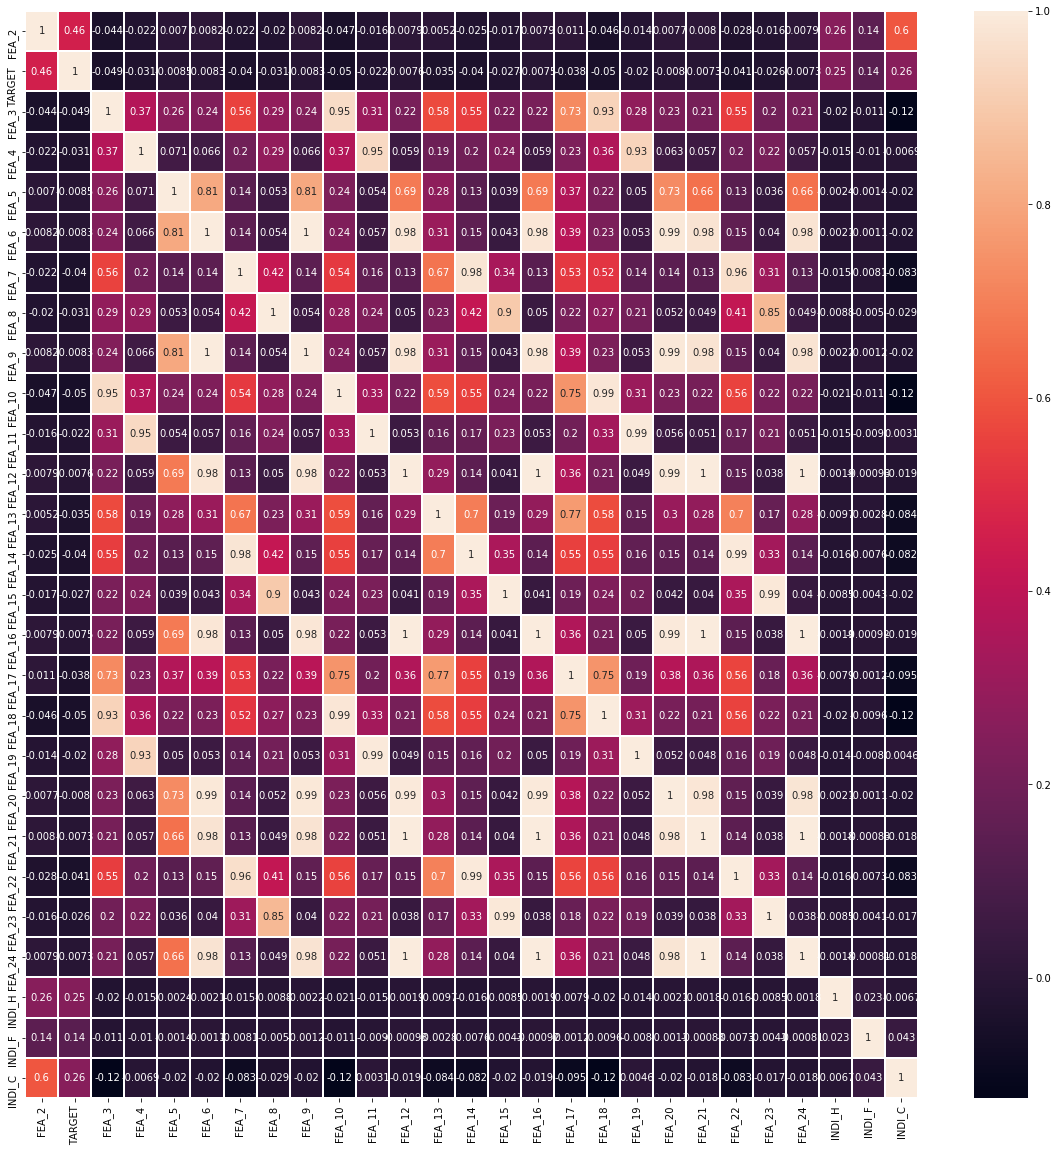

In [9]:
matrix=data.corr()
matrix
plt.figure(figsize = (20,20))
sns.heatmap(matrix, annot=True,linewidths=1)

# Variance Infaltion Factor

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
vif=data[['FEA_18', 'FEA_19', 'FEA_20', 'FEA_21']]
viff=data.replace(np.nan,0)
X = add_constant(vif)

pd.Series([variance_inflation_factor(X.values, i) 
              for i in range(X.shape[1])], 
              index=X.columns)


const      1.095632
FEA_18     1.163912
FEA_19     1.108769
FEA_20    29.246530
FEA_21    29.106233
dtype: float64

# Removing Outliers & Imputation

In [11]:
imp=data.drop(['TARGET'],axis=1)
#imputation for outliers removal
cat=[];numl=[]    
for feature in imp.columns.tolist():
    if imp[feature].dtype=='object':
        cat.append(feature)
    else:
        numl.append(feature)
imp[numl] = Imputer(strategy='mean').fit_transform(imp[numl])
imp = imp.fillna(imp.mode().iloc[0])
#outlier removal
from scipy import stats
behavior=imp[numl][(np.abs(stats.zscore(imp[numl]))<3).all(axis=1)]
behavior.shape
#getting raw data after outliers
anal=data[data.index.isin(behavior.index)]
anal.shape
#imputation after outlier removal
anal[numl] = Imputer(strategy='mean').fit_transform(anal[numl])
anal = anal.fillna(anal.mode().iloc[0])
#t_data=anal.drop(['CUSTOMER_NBR', 'CC_TAG','REV_month','portfolio_open_dt','SCV_Party_ID','COC_BT_amt', 'Gross_Annual_Income'],axis=1)
#t_data=anal.set_index('new_scv_party_id')
print('TOTAL COUNTS OF +VE AND _VE CLASS',anal['TARGET'].value_counts())
train_data=anal

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


TOTAL COUNTS OF +VE AND _VE CLASS 0    97234
1    19894
Name: TARGET, dtype: int64


In [12]:
DAT=pd.get_dummies(train_data)
x=DAT.drop('TARGET',axis=1)
y=DAT['TARGET']

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=0)
#normalizing the data
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)
X_test
# upsampling fro imbalanced dataset.
x_train_res,y_train_res=SMOTE().fit_sample(X_train, y_train)
n_cols=x_train_res.shape[1]
n_cols


66

In [13]:
#def create_model(optimizer='adam', init='uniform'):

Classifier=Sequential()
Classifier.add(Dense( units=30,activation="relu", kernel_initializer="uniform",input_dim=n_cols,)) 
#Classifier.add(Dropout(rate=0.2))

Classifier.add(Dense(activation="relu", units=20, kernel_initializer="uniform")) 
#Classifier.add(Dropout(rate=0.3))
Classifier.add(Dense(activation="relu", units=10, kernel_initializer="uniform")) 
Classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#return Classifier
Classifier.fit(x_train_res, y_train_res, batch_size = 32,epochs =10,validation_data = (X_test, y_test) )#,

Train on 136144 samples, validate on 35139 samples
Epoch 1/10
136144/136144 [==============================] - 5s 35us/step - loss: 0.1989 - acc: 0.9227 - val_loss: 0.1931 - val_acc: 0.9250
Epoch 2/10
136144/136144 [==============================] - 4s 31us/step - loss: 0.1419 - acc: 0.9457 - val_loss: 0.1467 - val_acc: 0.9434
Epoch 3/10
136144/136144 [==============================] - 4s 31us/step - loss: 0.1290 - acc: 0.9497 - val_loss: 0.1753 - val_acc: 0.9330
Epoch 4/10
136144/136144 [==============================] - 4s 32us/step - loss: 0.1227 - acc: 0.9516 - val_loss: 0.1331 - val_acc: 0.9508
Epoch 5/10
136144/136144 [==============================] - 4s 32us/step - loss: 0.1184 - acc: 0.9525 - val_loss: 0.1414 - val_acc: 0.9476
Epoch 6/10
136144/136144 [==============================] - 4s 32us/step - loss: 0.1156 - acc: 0.9535 - val_loss: 0.1297 - val_acc: 0.9510
Epoch 7/10
136144/136144 [==============================] - 4s 32us/step - loss: 0.1131 - acc: 0.9548 - val_loss: 0

In [14]:
# serialize model to JSON
model_json = Classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
Classifier.save_weights("model.h5")
print("model Saved  to this working directory") 
##################################################
from keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
#################################################
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

y_mod=loaded_model.predict(X_test)
prob=y_mod[:,0]
newprob=prob>0.50
y_pred1=newprob*1
y_pred1.ravel()
y_pred_nn=np.concatenate((1-y_mod,y_mod), axis = 1)

print('NEURAL_NETS TEST ACCURACY =',(metrics.accuracy_score (y_test, y_pred1))*100)
cm=confusion_matrix(y_test,y_pred1)
test_matric=pd.DataFrame(cm,columns=['predicted_negative','predicted_positive'],index=['actual_negative','actual_positive'])
print(test_matric)


model Saved  to this working directory
Loaded model from disk
NEURAL_NETS TEST ACCURACY = 95.44665471413529
                 predicted_negative  predicted_positive
actual_negative               27917                1245
actual_positive                 355                5622


# LOGISTIC REGRESSION

In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
logistic = linear_model.LogisticRegression()

penalty = ['l1', 'l2']
C = np.logspace(1, 2, 10)
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(x_train_res,y_train_res)

#best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

# Predict target 
y_pred_tes = best_model.predict(X_test)
print(confusion_matrix(y_test,y_pred_tes ),'confusion_matrix')
print('testing_accuracy Log_REG =',(metrics.accuracy_score (y_test, y_pred_tes ))*100)
y_pred_train = best_model.predict(X_train)
print(confusion_matrix(y_train,y_pred_train),'confusion_matrix')
print('training_accuracy Log_REG =',(metrics.accuracy_score (y_train,y_pred_train))*100)

ROC

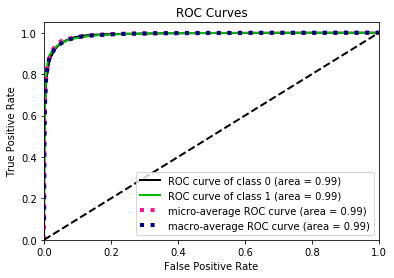

In [15]:
y_pred_test  = Classifier.predict_proba(X_test)
skplt.metrics.plot_roc (y_test,y_pred_nn)

GAIN_CURVE

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


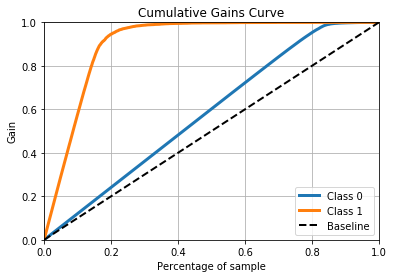

In [16]:
y_pred_test  = Classifier.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test,y_pred_nn)

LIFT_CURVE

C:\Users\tvimal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


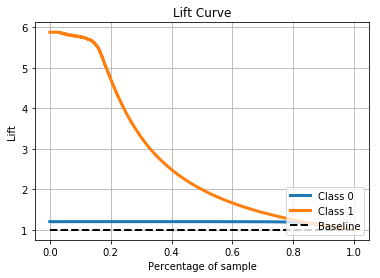

In [17]:
y_pred_test  = Classifier.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test,y_pred_nn)

KS_STATS

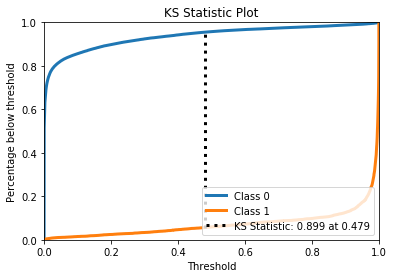

In [18]:
y_pred_test  = Classifier.predict_proba(X_test)
skplt.metrics.plot_ks_statistic(y_test,y_pred_nn)
plt.show()

RESPONDERS AND NON RESPONDERS CORRECTLY PREDICTED

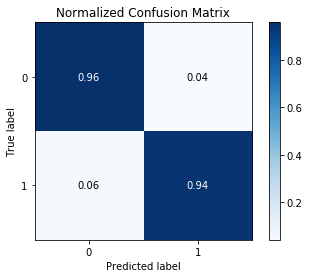

In [19]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred1, normalize=True)
plt.show()

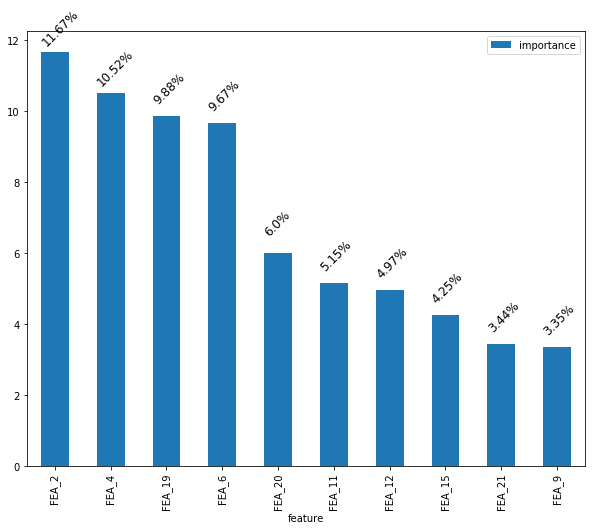

In [20]:
#Feature selection
from sklearn.ensemble import RandomForestClassifier

names = train_data.columns
rf = RandomForestClassifier().fit(x_train,y_train)
rf.fit(x_train,y_train)
#print ("Features sorted by their score:")
#print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_),names),reverse=True))
importances = pd.DataFrame({'feature':x.columns,'importance':np.round(rf.feature_importances_,4)*100})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
ax=importances.iloc[:10,:].plot.bar(figsize=(10,8))
#plt.figure(figsize=(30,25))
#importances
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03,i.get_height()+1,\
            str(round((i.get_height()/100)*100, 2))+'%', fontsize=12,color='black',rotation=45)#total)*100
